# Previsão de preço de ações


Esse projeto tem como objetivo apresentar diferentes métodos e modelos possíveis para a previsão de preço de ações baseados em Machine Learning. Com isso, será executado: uma Random Forest, uma Support Vector Machine e uma rede neural.

### Primeira parte: Importar os pacotes e o *dataset* a serem utilizados

In [38]:
# importar pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
!pip install yfinance --upgrade --no-cache-dir

In [40]:
# importar a yahoo finance
import yfinance as yf
yf.pdr_override()

In [41]:
# importar o dataset da petrobras
codigo = ['PETR4.SA']
petro = yf.Ticker(codigo[0])

In [42]:
# importar os dados do ibovespa 
code = ['BOVA11.SA']
bov = yf.Ticker(code[0])

In [43]:
# escolher o range do histórico a ser utilizado
petro = petro.history(start='2012-01-01', end='2022-07-01')

In [44]:
bov = bov.history(start='2012-01-01', end='2022-07-01')

### Limpar os dados e criar novas variáveis para o modelo

In [45]:
# cinco primeiras entradas de bov
bov.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-02,56.509998,57.169998,55.770000,57.029999,536180,0,0
2012-01-03,57.240002,58.400002,57.139999,58.400002,1044620,0,0
2012-01-04,57.709999,58.619999,57.709999,58.400002,464890,0,0
2012-01-05,58.139999,58.450001,57.150002,57.610001,656040,0,0
2012-01-06,57.830002,58.419998,57.480000,57.750000,550360,0,0


In [46]:
# remover Stock Splits e Dividends
bov = bov.drop(['Dividends', 'Stock Splits'], axis=1)
bov.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-02,56.509998,57.169998,55.770000,57.029999,536180
2012-01-03,57.240002,58.400002,57.139999,58.400002,1044620
2012-01-04,57.709999,58.619999,57.709999,58.400002,464890
2012-01-05,58.139999,58.450001,57.150002,57.610001,656040
2012-01-06,57.830002,58.419998,57.480000,57.750000,550360


In [47]:
# ver as cinco primeiras entradas
petro.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-02,11.955425,12.294468,11.816473,12.077703,20391300,0.0000,0
2012-01-03,12.233097,12.558117,12.221889,12.558117,22940500,0.1773,0
2012-01-04,12.429232,12.653383,12.317155,12.647779,18736900,0.0000,0
2012-01-05,12.546909,12.670194,12.412418,12.502079,19489000,0.0000,0
2012-01-06,12.591737,12.653379,12.468453,12.513284,13941000,0.0000,0


In [48]:
petro['Open'].shift(-1)

Date
2012-01-02    12.233097
2012-01-03    12.429232
2012-01-04    12.546909
2012-01-05    12.591737
2012-01-06    12.574927
                ...    
2022-06-24    26.820000
2022-06-27    28.580000
2022-06-28    28.480000
2022-06-29    27.650000
2022-06-30          NaN
Name: Open, Length: 2603, dtype: float64

In [49]:
# verificar a variável stock splits e dividendos
print(petro['Stock Splits'].unique())
petro['Dividends'].unique()

[0]


array([0.000000e+00, 1.773000e-01, 1.244000e-01, 2.000000e-01,
       3.861700e-01, 9.672000e-01, 5.000000e-02, 1.000000e-01,
       7.165630e-01, 1.949400e-02, 2.009250e-01, 4.219420e-01,
       4.490000e-04, 4.610000e-04, 7.928340e-01, 1.609911e+00,
       3.250487e+00, 2.970249e+00, 3.715490e+00])

In [50]:
# remover a variável Stock Splits
petro.drop('Stock Splits',axis=1, inplace=True)

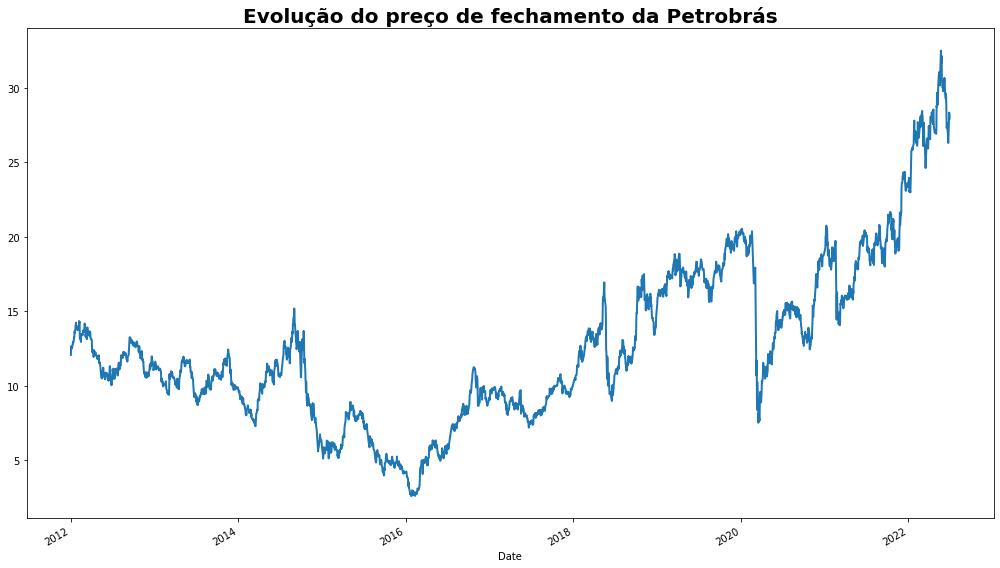

In [51]:
# gráfico com a evolução do preço da ação
fig, ax = plt.subplots(figsize=(14, 8))
petro['Close'].plot(kind='line', ax=ax, linewidth=2)
ax.set_title('Evolução do preço de fechamento da Petrobrás', fontsize=20, fontweight='bold')
plt.tight_layout()

In [52]:
# definir variável variação percentual do preço de abertura
petro['Open_Perc'] =  (petro['Open'] - petro['Open'].shift(1)) / petro['Open'].shift(1)
# preencher o valor faltante com o valor mais próximo
petro['Open_Perc'] = petro['Open_Perc'].fillna(value=0.023225)
petro['Open_Perc']

Date
2012-01-02    0.023225
2012-01-03    0.023226
2012-01-04    0.016033
2012-01-05    0.009468
2012-01-06    0.003573
                ...   
2022-06-24   -0.008154
2022-06-27    0.002242
2022-06-28    0.065623
2022-06-29   -0.003499
2022-06-30   -0.029143
Name: Open_Perc, Length: 2603, dtype: float64

In [53]:
# variável High minus Low price
petro['H-L'] = petro['High'] - petro['Low']

In [54]:
# variável close menos open price
petro['C-O'] = petro['Close'] - petro['Open']

In [55]:
# variável diferença entre os valores mais baixos
petro['low_dif'] = (petro['Low'] - petro['Low'].shift(1))
petro['low_dif'] = petro['low_dif'].fillna(value=0.405418)
petro['low_dif'] 

Date
2012-01-02    0.405418
2012-01-03    0.405415
2012-01-04    0.095266
2012-01-05    0.095263
2012-01-06    0.056035
                ...   
2022-06-24    0.059999
2022-06-27    0.480000
2022-06-28    1.360001
2022-06-29   -0.180000
2022-06-30   -0.440001
Name: low_dif, Length: 2603, dtype: float64

In [56]:
# variável diferença entre os valores mais altos
petro['high_dif'] = petro['High'] - petro['High'].shift(1)
petro['high_dif'] = petro['high_dif'].fillna(value=0.263652)
print(petro['high_dif'])

Date
2012-01-02    0.263652
2012-01-03    0.263649
2012-01-04    0.095266
2012-01-05    0.016810
2012-01-06   -0.016815
                ...   
2022-06-24   -0.289999
2022-06-27    0.980000
2022-06-28    0.760000
2022-06-29   -0.010000
2022-06-30   -0.760000
Name: high_dif, Length: 2603, dtype: float64


In [57]:
# variável média entre o maior e o menor preço
bov['mean'] = (bov['High'] + bov['Low']) / 2

# definir variável variação percentual da média do índice
bov['perc_mean'] = (bov['mean'].shift(1) - bov['mean']) / bov['mean'].shift(1)
bov['perc_mean'] = bov['perc_mean'].fillna(value=-0.023021)
bov['perc_mean']

Date
2012-01-02   -0.023021
2012-01-03   -0.023021
2012-01-04   -0.006837
2012-01-05    0.006275
2012-01-06   -0.002595
                ...   
2022-06-24    0.004028
2022-06-27   -0.016071
2022-06-28   -0.007960
2022-06-29    0.008667
2022-06-30    0.016864
Name: perc_mean, Length: 2603, dtype: float64

In [58]:
# variáveis de proporção
petro['open_close_ratio'] = petro['Open'] / petro['Close']
petro['high_close_ratio'] = petro['High'] / petro['Close']
petro['low_close_ratio'] = petro['Low'] / petro['Close']

### Variável-alvo do modelo

In [59]:
# definindo a variável 'tomorrow'
petro['tomorrow'] = petro['Close'].shift(-1)

In [60]:
# definindo a variável-alvo do problema
petro['target'] = (petro['tomorrow'] > petro['Close']).astype(int)

In [61]:
(petro['tomorrow'] - petro['Close']).max()

1.8666257858276367

In [62]:
# transformar as variáveis do ibov para o dataset do modelo
petro['bov_close'] = bov['Close']
petro['bov_mean'] = bov['mean']
petro['perc_mean'] = bov['perc_mean']

In [63]:
# variável média móvel de 7 dias
petro['weekly_mean'] = petro['Close'].rolling(7).mean()
petro['weekly_mean'] = petro['weekly_mean'].fillna(petro['weekly_mean'].iloc[9])

### Conjunto de treino e teste

In [64]:
# conjunto de treinamento e de teste
train = petro.iloc[:-680]
test = petro.iloc[-680:]

# definir as variáveis preditivas
predictors = ['Close', 'Volume', 'Open', 'High', 'Low',
              'C-O', 'H-L', 'Open_Perc', 'low_dif', 'high_dif', 'bov_close', 'perc_mean', 'bov_mean', 'weekly_mean', 
               'open_close_ratio', 'high_close_ratio', 'low_close_ratio']
X_train = train[predictors]
X_test = test[predictors]

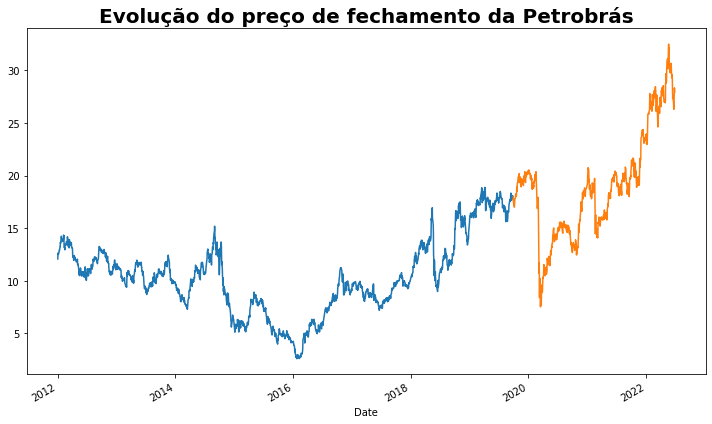

In [65]:
# gráfico com distinção entre dados de treinamento e teste
fig, ax = plt.subplots(figsize=(10, 6))
train['Close'].plot(kind='line', ax=ax)
test['Close'].plot(kind='line', ax=ax)
ax.set_title('Evolução do preço de fechamento da Petrobrás', fontsize=20, fontweight='bold')
plt.tight_layout()

### Padronizar os dados

In [66]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)

### Construção e treinamento do modelo

In [67]:
# modelo SVC
from sklearn.svm import SVC
model = SVC(kernel='poly', C=0.0001, degree=3)
model.fit(X_train, train['target'])

SVC(C=0.0001, kernel='poly')

### Previsão e avaliação do modelo

In [68]:
# métricas utilizadas
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [69]:
# prever o modelo
X_test = scale.transform(X_test)
preds = model.predict(X_test)

In [70]:
predict = model.predict(X_train)
print(precision_score(predict, train['target']))
accuracy_score(predict, train['target'])

1.0


0.50130005200208

In [71]:
preds = pd.Series(preds)

In [72]:
# precisão nos dados treinados
print('Precisão: ', precision_score(test['target'], preds))
print('Recall: ', recall_score(test['target'], preds))
print('Acurácia: ', accuracy_score(test['target'], preds))

Precisão:  0.5117647058823529
Recall:  1.0
Acurácia:  0.5117647058823529
